Part 1 :- Implementing Basic Image Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Loading CIFAR-10 dataset...


In [ ]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape:     {x_test.shape}")


Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


In [ ]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.4029 - loss: 1.9486 - val_accuracy: 0.1614 - val_loss: 3.0699
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6167 - loss: 1.0982 - val_accuracy: 0.6483 - val_loss: 0.9699
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6902 - loss: 0.8690 - val_accuracy: 0.5828 - val_loss: 1.2278
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7333 - loss: 0.7610 - val_accuracy: 0.5109 - val_loss: 1.5785
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7502 - loss: 0.7082 - val_accuracy: 0.7230 - val_loss: 0.8182
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7805 - loss: 0.6304 - val_accuracy: 0.7030 - val_loss: 0.8995
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8007 - loss: 0.5729 - val_accuracy: 0.7873 - val_loss: 0.6195
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8134 - loss: 0.5254 - val_acc

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")


Test accuracy: 0.8090 (80.90%)


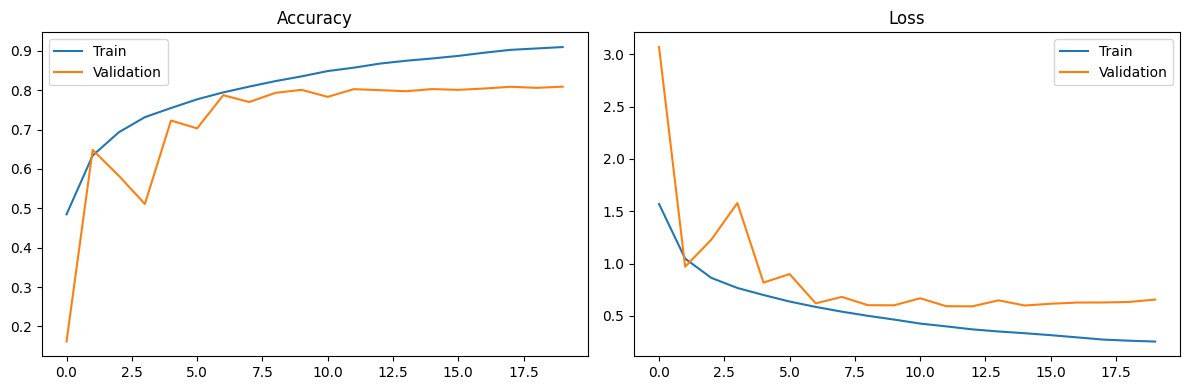

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


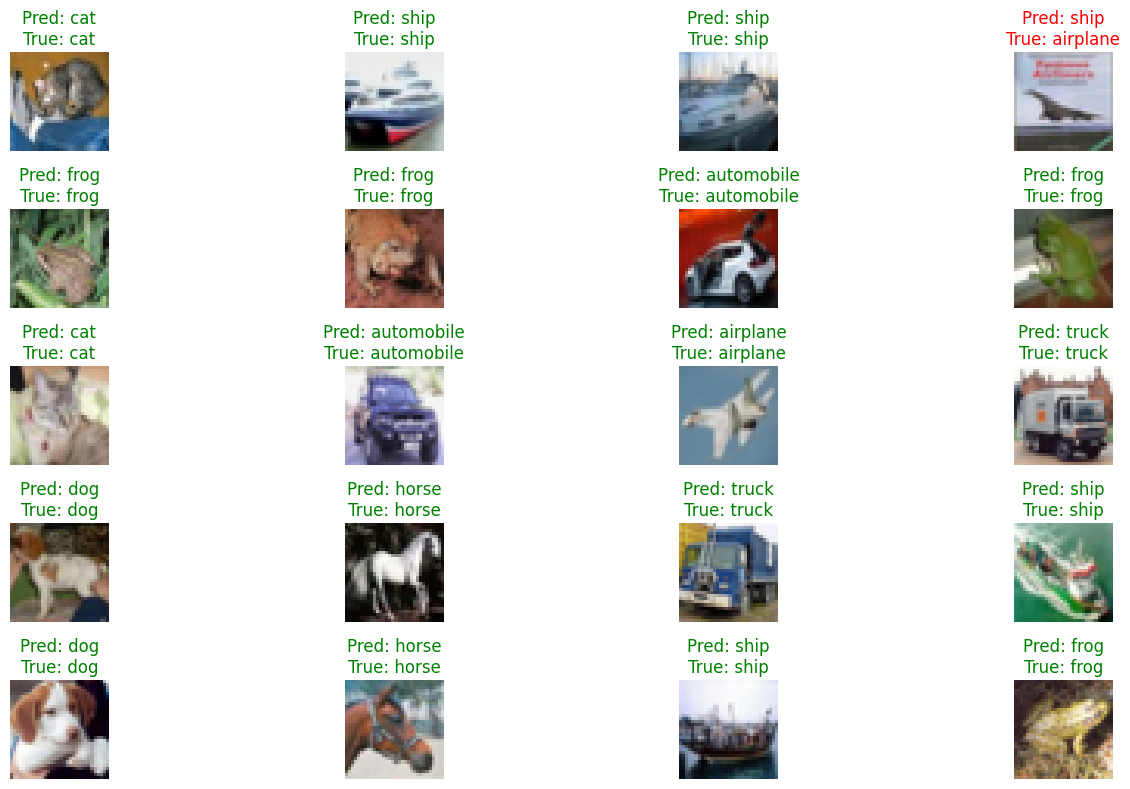

In [ ]:
num_images = 20
predictions = model.predict(x_test[:num_images])

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(5,4 , i+1)
    plt.imshow(x_test[i])
    plt.title(
        f"Pred: {class_names[predicted_classes[i]]}\n"
        f"True: {class_names[true_classes[i]]}",
        color=("green" if predicted_classes[i] == true_classes[i] else "red")
    )
    plt.axis('off')

plt.tight_layout()
plt.show()


Part 2 Transfer learning with pre-trained models


In [58]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download dataset
_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file(
    'cats_and_dogs.zip',
    origin=_URL,
    extract=True
)

base_dir = os.path.dirname(path_to_zip)

# ============================
# Auto-detect train folder
# ============================

train_dir = None
validation_dir = None

for root, dirs, files in os.walk(base_dir):
    if 'train' in dirs and 'validation' in dirs:
        train_dir = os.path.join(root, 'train')
        validation_dir = os.path.join(root, 'validation')
        break

print("Train dir:", train_dir)
print("Validation dir:", validation_dir)

# Safety check
assert train_dir is not None, "Train folder not found!"
assert validation_dir is not None, "Validation folder not found!"

# ============================
# Generators
# ============================

IMG_SIZE = (160, 160)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Train dir: /root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered/train
Validation dir: /root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered/validation
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [61]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [70]:
history_phase1 = model.fit(
    train_generator,
    epochs=10,
    batch_size=128,
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 350ms/step - accuracy: 0.9900 - loss: 0.0256 - val_accuracy: 0.9660 - val_loss: 0.0981
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9700 - val_loss: 0.0832
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.9897 - loss: 0.0264 - val_accuracy: 0.9660 - val_loss: 0.1259
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 353ms/step - accuracy: 0.9871 - loss: 0.0256 - val_accuracy: 0.9710 - val_loss: 0.0912
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9899 - loss: 0.0279 - val_accuracy: 0.9720 - val_loss: 0.0850
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - accuracy: 0.9944 - loss: 0.0160 - val_accuracy: 0.9660 - val_loss: 0.1309
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 343ms/step - accuracy: 0.9944 - loss: 0.0204 - val_accuracy: 0.9740 - val_loss: 0.0861
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 348ms/step - accuracy: 0.9898 - loss: 0.0360 - val_accu

In [71]:
loss, accuracy= model.evaluate(validation_generator)
print(accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9707 - loss: 0.0918
0.9750000238418579


In [72]:
base_model.trainable = True

for layer in base_model.layers[:-16]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_phase2 = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 424ms/step - accuracy: 0.9931 - loss: 0.0164 - val_accuracy: 0.9580 - val_loss: 0.1669
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 348ms/step - accuracy: 0.9824 - loss: 0.0395 - val_accuracy: 0.9680 - val_loss: 0.1023
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 0.9966 - loss: 0.0131 - val_accuracy: 0.9650 - val_loss: 0.1161
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.9925 - loss: 0.0198 - val_accuracy: 0.9650 - val_loss: 0.1315
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 353ms/step - accuracy: 0.9972 - loss: 0.0118 - val_accuracy: 0.9650 - val_loss: 0.1519
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 348ms/step - accuracy: 0.9890 - loss: 0.0218 - val_accuracy: 0.9750 - val_loss: 0.0758
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 345ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9770 - val_loss: 0.1101
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step - accuracy: 0.9978 - loss: 0.0052 - val_accu

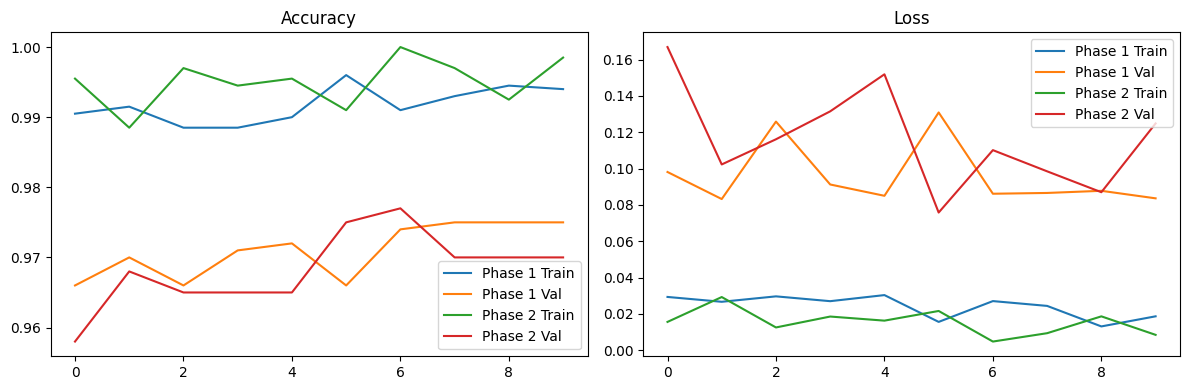

In [73]:
def plot_history(histories, titles):
    plt.figure(figsize=(12, 4))
    for i, hist in enumerate(histories):
        plt.subplot(1, 2, 1)
        plt.plot(hist.history['accuracy'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_accuracy'], label=f'{titles[i]} Val')
        plt.title('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(hist.history['loss'], label=f'{titles[i]} Train')
        plt.plot(hist.history['val_loss'], label=f'{titles[i]} Val')
        plt.title('Loss')
        plt.legend()
    plt.tight_layout()
    plt.show()
plot_history([history_phase1, history_phase2], ['Phase 1', 'Phase 2'])


In [74]:
loss, accuracy= model.evaluate(validation_generator)
print(accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9690 - loss: 0.1291
0.9700000286102295
